# NullClass Data Analysis 1

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
apps_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

In [4]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
#pd.read_csv()
#pd.read_excel()
#pd.read_sql()
#pd.read_json()

# Data cleaning

In [7]:
apps_df = apps_df.dropna(subset=['Rating'])
for column in apps_df.columns :
    apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df=apps_df[apps_df['Rating']<=5]
reviews_df.dropna(subset=['Translated_Review'],inplace=True)

In [8]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.6+ KB


In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [11]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [12]:
#converting the Installs column to numeric by removing commas and +
apps_df['Installs']=apps_df['Installs'].str.replace(',','').str.replace('+','').astype(int)
#Convert price column to numeric by removing $
apps_df['Price']=apps_df['Price'].str.replace('$','').astype(float)

In [13]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
merged_df= pd.merge(apps_df,reviews_df,on='App',how='inner')
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59124 entries, 0 to 59123
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     59124 non-null  object 
 1   Category                59124 non-null  object 
 2   Rating                  59124 non-null  float64
 3   Reviews                 59124 non-null  object 
 4   Size                    59124 non-null  object 
 5   Installs                59124 non-null  int32  
 6   Type                    59124 non-null  object 
 7   Price                   59124 non-null  float64
 8   Content Rating          59124 non-null  object 
 9   Genres                  59124 non-null  object 
 10  Last Updated            59124 non-null  object 
 11  Current Ver             59124 non-null  object 
 12  Android Ver             59124 non-null  object 
 13  Translated_Review       59124 non-null  object 
 14  Sentiment               59124 non-null

# Data Transmission

In [16]:
apps_df['Reviews']= apps_df['Reviews'].astype(int)

In [17]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k',''))/1024
    else:
        return np.nan
apps_df['Size']=apps_df['Size'].apply(convert_size)

In [19]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
#logarithmic
apps_df['log_Installs']=np.log(apps_df['Installs'])
apps_df['log_Reviews']=np.log(apps_df['Reviews'])

In [21]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_Installs,log_Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925,6.874198


In [22]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
log_Installs      float64
log_Reviews       float64
dtype: object

In [23]:
#categorize rating
def rating_group(rating):
    if rating>=4:
        return "top rated app"
    elif rating>=3:
        return "Above average"
    elif rating>=2:
        return "Average"
    else:
        return "Below average"
apps_df['Rating_group']=apps_df['Rating'].apply(rating_group)

In [24]:
#revenue Column
apps_df['Revenue']=apps_df['Price']*apps_df['Installs']

In [25]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_Installs,log_Reviews,Rating_group,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340,5.068904,top rated app,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363,6.874198,Above average,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948,11.379508,top rated app,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534,12.281384,top rated app,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925,6.874198,top rated app,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,6.214608,1.945910,top rated app,0.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,8.517193,3.637586,top rated app,0.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,4.605170,1.386294,top rated app,0.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,6.907755,4.736198,top rated app,0.0


In [26]:
sia= SentimentIntensityAnalyzer()

In [27]:
#polarity score in SIA
#Positive, Negative, Neutral and Compound: -1 very negative; +1 very positive

In [28]:
review = "This app is amazing! I love the new features."
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [29]:
review = "This app is very bad. I hate the new features."
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.526, 'neu': 0.474, 'pos': 0.0, 'compound': -0.8304}


In [30]:
review = "this app is okay"
sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}


In [31]:
reviews_df["sentiment_score"]=reviews_df["Translated_Review"].apply(lambda x:sia.polarity_scores(str(x))['compound'])

In [32]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,sentiment_score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [33]:
apps_df['Last Updated']=pd.to_datetime(apps_df['Last Updated'], errors= 'coerce')

In [34]:
apps_df['Year']=apps_df['Last Updated'].dt.year

In [35]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_Installs,log_Reviews,Rating_group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,top rated app,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above average,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,top rated app,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,top rated app,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,top rated app,0.0,2018


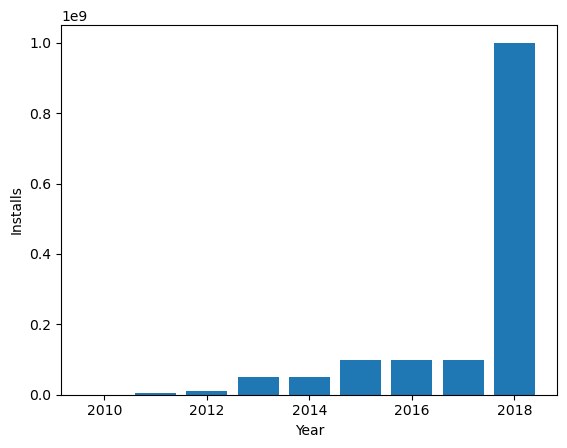

In [36]:
import matplotlib.pyplot as plt
plt.bar(apps_df['Year'],apps_df['Installs'])
plt.xlabel("Year")
plt.ylabel('Installs')
plt.show()

In [37]:
html_files_path= "./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [38]:
plot_containers = ""

In [39]:
#to save eash plotly graph to an html files 
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    #append the plot and its insight to the plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs="inline")

In [40]:
plot_width=400
plot_height = 300
plot_bg_color = "black"
text_color = "white"
title_font = {'size' : 16}
axis_font = {'size' : 12}

In [41]:
#figure 1
category_counts=apps_df["Category"].value_counts().nlargest(10)
fig1= px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels = {'x':"Category", 'y': "Count"},
    title = "Top categories on Play Store",
    color = category_counts.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
    width = 400,
    height = 300
)
fig1.update_layout(
    plot_bgcolor="black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = {"size" :16},
    xaxis = dict(title_font ={'size' :12}),
    yaxis = dict(title_font = {'size':12}),
    margin = dict(l=10,r=10,t=30,b=10)
)
#fig1.update_trace(marker=dict(pattern=dict(line=dict(color="white",widht=1))))
save_plot_as_html(fig1,"category graph 1.html", "The top categories of Play Store are dominated by tools, entertainment, and productivity apps.")
    


In [42]:
#figure 2
type_counts=apps_df["Type"].value_counts()
fig2= px.pie(
    values = type_counts.values,
    names = type_counts.index,
    title = "App type distribution",
    color_discrete_sequence = px.colors.sequential.RdBu,
    width = 400,
    height = 300
)
fig2.update_layout(
    plot_bgcolor="black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = {"size" :16},
    margin = dict(l=10,r=10,t=30,b=10)
)
#fig2.update_trace(marker=dict(pattern=dict(line=dict(color="white",widht=1))))
save_plot_as_html(fig2,"Type graph 2.html", "MOst aps on the Play Store are the free, indicating a stretagy to attractusers first and monetize through ads or in app purchase.")
    

In [43]:
#figure 3 Topic: "How the app ratings are distributed"
category_counts=apps_df["Category"].value_counts().nlargest(10)
fig3= px.histogram(
    apps_df,
    x= 'Rating',
    nbins = 20,
    title = "Rating Distribution",
    color_discrete_sequence = ['#636EFA'],
    width = 400,
    height = 300
)
fig3.update_layout(
    plot_bgcolor="black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = {"size" :16},
    xaxis = dict(title_font ={'size' :12}),
    yaxis = dict(title_font = {'size':12}),
    margin = dict(l=10,r=10,t=30,b=10)
)
#fig1.update_trace(marker=dict(pattern=dict(line=dict(color="white",widht=1))))
save_plot_as_html(fig3,"Rating graph 3.html", "Ratings are skewed towards higher value, suggesting that most apps are rated favorably by users.")
    

In [44]:
#figure 4
sentiment_counts=reviews_df["sentiment_score"].value_counts()
fig4= px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels = {'x':"Sentiment", 'y': "Count"},
    title = "Sentiment Distribution",
    color = sentiment_counts.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
    width = 400,
    height = 300
)
fig4.update_layout(
    plot_bgcolor="black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = {"size" :16},
    xaxis = dict(title_font ={'size' :12}),
    yaxis = dict(title_font = {'size':12}),
    margin = dict(l=10,r=10,t=30,b=10)
)
#fig1.update_trace(marker=dict(pattern=dict(line=dict(color="white",widht=1))))
save_plot_as_html(fig4,"Sentiment graph 4.html", "Sentiments in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments.")    

In [45]:
#figure 5
installs_by_category=apps_df.groupby('Category')["Installs"].sum().nlargest(10)
fig5= px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels = {'x':"Installs", 'y': "Category"},
    title = "Instals by Category",
    color = installs_by_category.index,
    color_discrete_sequence = px.colors.sequential.Blues,
    width = 400,
    height = 300
)
fig5.update_layout(
    plot_bgcolor="black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = {"size" :16},
    xaxis = dict(title_font ={'size' :12}),
    yaxis = dict(title_font = {'size':12}),
    margin = dict(l=10,r=10,t=30,b=10)
)
#fig1.update_trace(marker=dict(pattern=dict(line=dict(color="white",widht=1))))
save_plot_as_html(fig5,"Installs graph 5.html", "The categories with tghe most installs are social and communication apps, reflecting their broad appeal and daily uses.") 

In [46]:
#figure 6 : Updates per Year Plot:
updates_per_year=apps_df["Last Updated"].dt.year.value_counts().sort_index()
fig6= px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels = {'x':"Year", 'y': "Number of Updates"},
    title = "Number of updates over the years",
    color_discrete_sequence = ['#AB63FA'],
    width = plot_width,
    height = plot_height
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor = plot_bg_color,
    font_color = text_color,
    title_font =title_font,
    xaxis = dict(title_font =axis_font),
    yaxis = dict(title_font =axis_font),
    margin = dict(l=10,r=10,t=30,b=10)
)
#fig1.update_trace(marker=dict(pattern=dict(line=dict(color="white",widht=1))))
save_plot_as_html(fig6,"Updates_per_year.html", "Updates has been increasing over the year, showing that developers are actively maintaining and improving their apps") 

In [47]:
#figure 7
revenue_by_category=apps_df.groupby('Category')["Revenue"].sum().nlargest(10)
fig7= px.bar(
    x=revenue_by_category.index,
    y=revenue_by_category.values,
    labels = {'x':"Category", 'y': "Revenue"},
    title = "Revenue by Category",
    color = revenue_by_category.index,
    color_discrete_sequence = px.colors.sequential.Greens,
    width = 400,
    height = 300
)
fig7.update_layout(
    plot_bgcolor="black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = {"size" :16},
    xaxis = dict(title_font ={'size' :12}),
    yaxis = dict(title_font = {'size':12}),
    margin = dict(l=10,r=10,t=30,b=10)
)
#fig1.update_trace(marker=dict(pattern=dict(line=dict(color="white",widht=1))))
save_plot_as_html(fig7,"Revenue graph 7.html", "Categories such as bussiness and Productivity lead in revenue generation, indicating their monetization potential")


In [48]:
#figure 8
genre_counts=apps_df["Genres"].str.split(';',expand=True).stack().value_counts().nlargest(10)
fig8= px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels = {'x':"Genre", 'y': "Count"},
    title = "Top Genres",
    color = genre_counts.index,
    color_discrete_sequence = px.colors.sequential.OrRd,
    width = 400,
    height = 300
)
fig8.update_layout(
    plot_bgcolor="black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = {"size" :16},
    xaxis = dict(title_font ={'size' :12}),
    yaxis = dict(title_font = {'size':12}),
    margin = dict(l=10,r=10,t=30,b=10)
)
#fig1.update_trace(marker=dict(pattern=dict(line=dict(color="white",widht=1))))
save_plot_as_html(fig8,"Genre graph 8.html", "Action and Casual genres are the most common, reflecting users' preference for engaging and easy-to-play games")


In [49]:
#Figure 9
fig9=px.scatter(
    apps_df,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig9,"Update Graph 9.html","The Scatter Plot shows a weak correlation between the last update and ratings, suggesting that more frequent updates don't always result in better ratings.")

In [50]:
#Figure 10 : compare the ratings of paid and free apps:
fig10=px.box(
    apps_df,
    y='Type',
    x='Rating',
    color='Type',
    title='Rating for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)
#fig1.update_traces(marker=dict(pattern=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig10,"Paid Free Graph 10.html","Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for")

In [51]:
plot_containers_split=plot_containers.split('</div>')

In [52]:
if len(plot_containers_split)>1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [53]:
dashboard_html=""" 
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """

In [54]:
final_html=dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)
#it is used to create the final html content for our dashboard by filling the place holders.

In [55]:
dashboard_path=os.path.join(html_files_path,"web page.html")

In [56]:
with open(dashboard_path,"w", encoding='utf-8') as f:
    f.write(final_html)

In [57]:
webbrowser.open('file://'+os.path.realpath(dashboard_path))

True